### [pickle — Python object serialization](https://docs.python.org/3/library/pickle.html)

Moduł [pickle](https://docs.python.org/3/library/pickle.html) implementuje binarny protokół do serializacji i deserializacji obiektów Pythonowych. Za jego pomocą możemy:
- serializować obiekt Pythonowy do formatu binarnego (aka `pickle`)
- deserializować plik/strumień binarny do obiektu pythonowego (aka `unpickle`)

Termin piklowanie (ang. `pickling`) jest stosowany zamiennie z terminami takimi jak `serialization`, `marhalling`, `flattening`, ale jest charakterystyczny wyłącznie dla biblioteki `pickle`.

Popatrzmy na moduł pickle.

In [1]:
# poznajemy bibliotekę pickle
import pickle

print(dir(pickle))

['ADDITEMS', 'APPEND', 'APPENDS', 'BINBYTES', 'BINBYTES8', 'BINFLOAT', 'BINGET', 'BININT', 'BININT1', 'BININT2', 'BINPERSID', 'BINPUT', 'BINSTRING', 'BINUNICODE', 'BINUNICODE8', 'BUILD', 'BYTEARRAY8', 'DEFAULT_PROTOCOL', 'DICT', 'DUP', 'EMPTY_DICT', 'EMPTY_LIST', 'EMPTY_SET', 'EMPTY_TUPLE', 'EXT1', 'EXT2', 'EXT4', 'FALSE', 'FLOAT', 'FRAME', 'FROZENSET', 'FunctionType', 'GET', 'GLOBAL', 'HIGHEST_PROTOCOL', 'INST', 'INT', 'LIST', 'LONG', 'LONG1', 'LONG4', 'LONG_BINGET', 'LONG_BINPUT', 'MARK', 'MEMOIZE', 'NEWFALSE', 'NEWOBJ', 'NEWOBJ_EX', 'NEWTRUE', 'NEXT_BUFFER', 'NONE', 'OBJ', 'PERSID', 'POP', 'POP_MARK', 'PROTO', 'PUT', 'PickleBuffer', 'PickleError', 'Pickler', 'PicklingError', 'PyStringMap', 'READONLY_BUFFER', 'REDUCE', 'SETITEM', 'SETITEMS', 'SHORT_BINBYTES', 'SHORT_BINSTRING', 'SHORT_BINUNICODE', 'STACK_GLOBAL', 'STOP', 'STRING', 'TRUE', 'TUPLE', 'TUPLE1', 'TUPLE2', 'TUPLE3', 'UNICODE', 'Unpickler', 'UnpicklingError', '_Framer', '_HAVE_PICKLE_BUFFER', '_Pickler', '_Stop', '_Unframer

Rozpoznajemy znajome funkcje: [`dump`](https://docs.python.org/3/library/pickle.html#pickle.dump), [`dumps`](https://docs.python.org/3/library/pickle.html#pickle.dumps), [`load`](https://docs.python.org/3/library/pickle.html#pickle.load), [`loads`](https://docs.python.org/3/library/pickle.html#pickle.loads). Są to standardowe funkcje, które bardzo częto pojawiają się w kontekstach związanych z serializacją/deserializacją w Pythonie.

**No to spiklujmy jakiś nasz obiekt**

In [2]:
# Tworzymy jakąś klasę i ją inicjalizujemy
class Cow:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def speak(self):
        print(f'Moo, I am {self.name} and I am {self.age} years old')

cow1 = Cow('Berta', 5)
cow1.speak()

Moo, I am Berta and I am 5 years old


In [ ]:
# I teraz spiklujmy nasz obiek
# Uwaga! Zapisujemy w formacie binarnym (stąd flaga 'b'-  bez nie nie zadziała)
with open('cow1.pickle', 'wb') as file:
    pickle.dump(cow1, file)

Identycznie jak było przy formacie json, obiekt pythonowy możemy też przekonwertować do napisu (binarnego) za pomocą funkcji [`dumps`](https://docs.python.org/3/library/pickle.html#pickle.dumps).

In [ ]:
# Można go spiklować do ciągu bitów


In [ ]:
# jakiego typu jest wynik?


**A teraz w drugą stronę "odpiklujmy spiklowany" obiekt (unpickle).**

- z użyciem funkcji [`loads`](https://docs.python.org/3/library/pickle.html#pickle.loads) biblioteki `pickle`

In [ ]:
# Załadowujemy obiekt z ciągu bitów


In [ ]:
# sprawdźmy atrybut wczytanego obiektu


- z użyciem funkcji [`load`](https://docs.python.org/3/library/pickle.html#pickle.load) biblioteki `pickle`

In [4]:
# Załadowujemy obiekt z pliku binarnego pickle
with open('cow.pickle', 'rb') as file:
    loaded_cow2 = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'cow.pickle'

In [ ]:
# sprawdźmy atrybut wczytanego obiektu
loaded_cow2.age

#### Ważna uwaga

Kiedy wchodzimy na stronę biblioteki [`pickle`](https://docs.python.org/3/library/pickle.html) naszym oczom ukazuje się wielka czerwona ramka

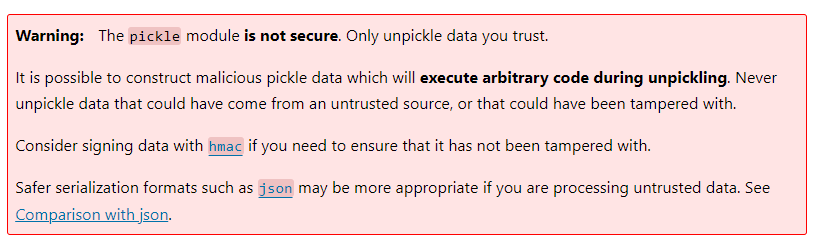

Dlaczego piklowanie nie jest bezpieczne ?

Ponieważ ktoś może spiklować jakiś obiekt, który przy odpiklowywaniu wykona jakieś szkodliwe operacje.

W jaki sposób to zrobić?

Wystarczy wiedzieć, że moduł pickle podczas odpiklowywania obiektu wywołuje m.in. metodę `__setstate__` tego obiektu. Tak metoda służy do ustawienia atrybutów wczytywanego obiektu. Jeżeli w metodzie `__setstate__` umieścimy szkodliwy kod to zostanie on wykonany na komputerze osoby, która będzie próbowała odpiklować ten obiekt.

Popatrzmy

In [ ]:
# Zainfekowany obiekt


Utwórzmy obiekt naszej klasy i spiklujmy go.

In [ ]:
# inicjalizacja i piklowanie


Teraz mamy spiklowany obiekt, który możemy umieścić gdziekolwiek, na przykład w sieci, albo przesłać komuś. I niczego nieświadoma ofiara przy wczytywaniu zawartości (`unpikle`):

In [ ]:
# odpiklowanie


**Zapamiętaj!**

Nigdy nie należy odpiklowywać zawartości niewiadomego pochodzenia.